. Naive Bayes

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
data = pd.read_csv('diabetes.csv')
import matplotlib.pyplot as plt   #رسمه التوضيح
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
#  Data Exploration
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [4]:
print(data.describe())#Descriptive Statistics

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [5]:
# missing values
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
# Separate features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
# Step 4: Train the Naive Bayes Model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [9]:
#  Make predictions
y_pred = model.predict(X_test)

# تصنيف النتائج بناءً على قيمتها
predicted_labels = ['Diabetic' if pred == 1 else 'Non-Diabetic' for pred in y_pred]

# Print the predictions with their labels
for i, pred in enumerate(y_pred):
    print(f"Prediction {i+1}: {predicted_labels[i]} (Raw Value: {pred})")



Prediction 1: Non-Diabetic (Raw Value: 0)
Prediction 2: Non-Diabetic (Raw Value: 0)
Prediction 3: Non-Diabetic (Raw Value: 0)
Prediction 4: Non-Diabetic (Raw Value: 0)
Prediction 5: Diabetic (Raw Value: 1)
Prediction 6: Diabetic (Raw Value: 1)
Prediction 7: Non-Diabetic (Raw Value: 0)
Prediction 8: Non-Diabetic (Raw Value: 0)
Prediction 9: Non-Diabetic (Raw Value: 0)
Prediction 10: Diabetic (Raw Value: 1)
Prediction 11: Non-Diabetic (Raw Value: 0)
Prediction 12: Diabetic (Raw Value: 1)
Prediction 13: Diabetic (Raw Value: 1)
Prediction 14: Non-Diabetic (Raw Value: 0)
Prediction 15: Non-Diabetic (Raw Value: 0)
Prediction 16: Non-Diabetic (Raw Value: 0)
Prediction 17: Non-Diabetic (Raw Value: 0)
Prediction 18: Non-Diabetic (Raw Value: 0)
Prediction 19: Diabetic (Raw Value: 1)
Prediction 20: Non-Diabetic (Raw Value: 0)
Prediction 21: Non-Diabetic (Raw Value: 0)
Prediction 22: Non-Diabetic (Raw Value: 0)
Prediction 23: Diabetic (Raw Value: 1)
Prediction 24: Non-Diabetic (Raw Value: 0)
Predi

                   Status  Count
0         Actual Diabetic     80
1      Predicted Diabetic     85
2     Actual Non-Diabetic    151
3  Predicted Non-Diabetic    146


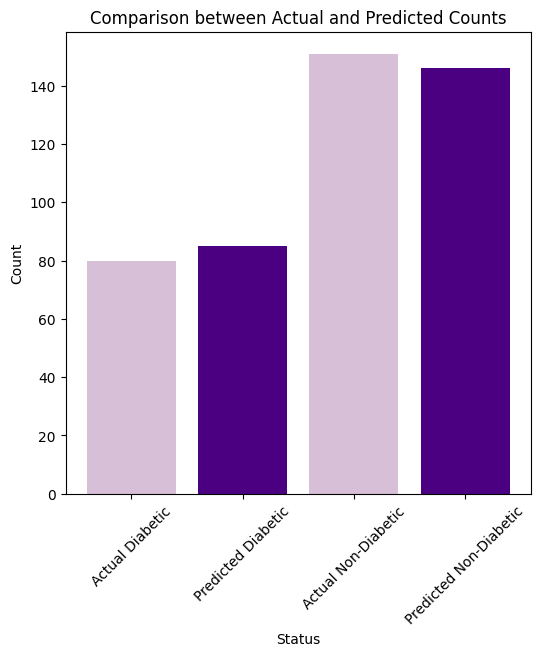

In [10]:

# حساب عدد المرضى وغير المرضى الحقيقين والمتوقعين
actual_diabetic = sum(y_test)  # المرضى الحقيقيين
predicted_diabetic = sum(y_pred)  # المرضى المتوقعين

actual_non_diabetic = len(y_test) - actual_diabetic  # غير المرضى الحقيقيين
predicted_non_diabetic = len(y_pred) - predicted_diabetic  # غير المرضى المتوقعين

# إنشاء DataFrame للملخص
summary = pd.DataFrame({
    'Status': ['Actual Diabetic', 'Predicted Diabetic', 'Actual Non-Diabetic', 'Predicted Non-Diabetic'],
    'Count': [actual_diabetic, predicted_diabetic, actual_non_diabetic, predicted_non_diabetic]
})

# عرض الملخص
print(summary)

# رسم بياني يوضح النسبة بين التوقع والحقيقة لكل الفئات
plt.figure(figsize=(6, 6))
plt.bar(summary['Status'], summary['Count'], color=['#D8BFD8', '#4B0082', '#D8BFD8','#4B0082' ])
plt.title('Comparison between Actual and Predicted Counts')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 74.46%


In [12]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



In [13]:
file_path = '/content/diabetes.csv'  # المسار الصحيح للملف
diabetes_data = pd.read_csv(file_path)

Confusion Matrix for Naive Bayes:
 [[119  32]
 [ 27  53]]


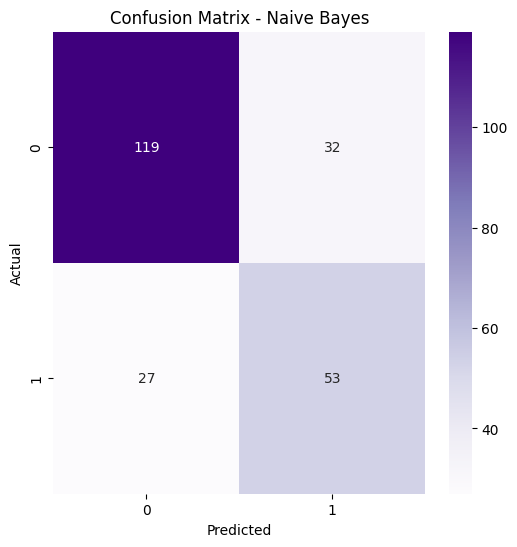

In [14]:
from sklearn.metrics import confusion_matrix  # تأكد من استيراد هذه الدالة

# Evaluate the Naive Bayes Model
conf_matrix_nb = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Naive Bayes:\n", conf_matrix_nb)

#Optional: Visualize the Confusion Matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Logistic Regression

In [15]:
# استبدال القيم الي فيها صفر بالوسيط
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_replace:
    median = diabetes_data[col].median()
    diabetes_data[col] = diabetes_data[col].replace(0, median)

In [16]:

X = diabetes_data.drop('Outcome', axis=1)  # المدخلات
y = diabetes_data['Outcome']  # النتيجة

In [17]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# بناء نموذج
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [19]:
y_pred = model.predict(X_test)#يبني النموذج

In [20]:
accuracy = accuracy_score(y_test, y_pred) * 100  # كنسبة مئوية

# طباعة الدقة
print(f'Accuracy of Logistic Regression: {accuracy:.2f}%')

Accuracy of Logistic Regression: 74.46%


Confusion Matrix for Logistic Regression:
 [[124  27]
 [ 32  48]]


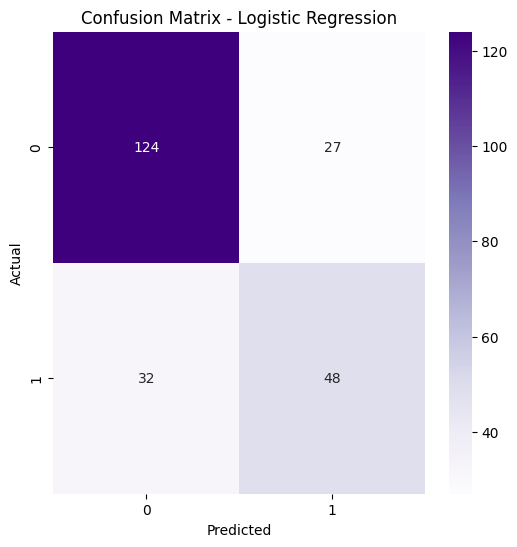

In [21]:
# Evaluate the Logistic Regression Model
conf_matrix_lr = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Logistic Regression:\n", conf_matrix_lr)

# Optional: Visualize the Confusion Matrix using a heatmap
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()